In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import librosa
import librosa.display
import IPython.display as pld
import warnings
warnings.filterwarnings('ignore')
import csv
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/max_feature_whole_speech_emodb_csvfile.csv')

In [ ]:
df=df.fillna(0)

In [ ]:
df

,filename,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,Label
0,03a01Fa.wav,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,...,0.675823,0.684034,0.627376,-0.001574,0.012645,-0.027069,0.019313,-0.002252,-0.006220,happyness
1,03a01Nc.wav,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,...,0.635522,0.544438,0.532856,-0.018488,0.011973,-0.011038,0.079758,-0.021044,-0.019445,neutral
2,03a01Wa.wav,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,...,0.648380,0.675295,0.560000,-0.010576,-0.000228,0.011102,-0.074188,0.012116,-0.000779,anger
3,03a02Fc.wav,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,...,0.575784,0.523305,0.423375,0.009395,-0.025547,-0.035554,-0.025885,0.011198,-0.000163,happyness
4,03a02Nc.wav,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,...,0.615263,0.566964,0.605103,-0.008389,-0.051995,-0.056544,-0.020014,0.013964,0.008349,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,16b10Lb.wav,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,...,0.569263,0.551809,0.576764,0.016046,-0.025610,0.025426,-0.094371,0.008999,-0.004985,boredom
531,16b10Tb.wav,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,...,0.638155,0.574542,0.503516,0.019632,0.046315,0.074801,0.018078,0.022948,-0.016365,sadness
532,16b10Td.wav,-467.15588,52.217026,10.470471,47.414780,8.690019,15.601270,-2.032935,4.985774,-7.432734,...,0.523647,0.509723,0.498566,0.051532,0.015525,-0.006052,0.018201,0.004361,-0.021649,sadness
533,16b10Wa.wav,-526.19570,11.317784,-18.942173,29.540787,-28.057306,1.299599,-16.251814,-7.512440,-23.191568,...,0.528861,0.501070,0.496900,0.007856,0.005917,-0.045393,-0.004246,-0.001628,0.015051,anger


In [ ]:
df.replace({ 'happyness': 0, 'neutral': 1,'anger': 2,'sadness': 3, 'fear':4,'boredom':5,'disgust':6}, inplace=True)

In [ ]:
x=df.iloc[:,1:(df.shape[1]-1)]
y=df.iloc[:,-1]

In [ ]:
x

,1,2,3,4,5,6,7,8,9,10,...,250,251,252,253,254,255,256,257,258,259
0,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,1.597646,...,0.635609,0.675823,0.684034,0.627376,-0.001574,0.012645,-0.027069,0.019313,-0.002252,-0.006220
1,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,7.846351,...,0.646426,0.635522,0.544438,0.532856,-0.018488,0.011973,-0.011038,0.079758,-0.021044,-0.019445
2,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,-2.445232,...,0.600825,0.648380,0.675295,0.560000,-0.010576,-0.000228,0.011102,-0.074188,0.012116,-0.000779
3,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,-7.022445,...,0.506934,0.575784,0.523305,0.423375,0.009395,-0.025547,-0.035554,-0.025885,0.011198,-0.000163
4,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,2.848643,...,0.698287,0.615263,0.566964,0.605103,-0.008389,-0.051995,-0.056544,-0.020014,0.013964,0.008349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,-3.372870,...,0.566316,0.569263,0.551809,0.576764,0.016046,-0.025610,0.025426,-0.094371,0.008999,-0.004985
531,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,-1.778869,...,0.671834,0.638155,0.574542,0.503516,0.019632,0.046315,0.074801,0.018078,0.022948,-0.016365
532,-467.15588,52.217026,10.470471,47.414780,8.690019,15.601270,-2.032935,4.985774,-7.432734,2.523657,...,0.531997,0.523647,0.509723,0.498566,0.051532,0.015525,-0.006052,0.018201,0.004361,-0.021649
533,-526.19570,11.317784,-18.942173,29.540787,-28.057306,1.299599,-16.251814,-7.512440,-23.191568,-13.485355,...,0.497285,0.528861,0.501070,0.496900,0.007856,0.005917,-0.045393,-0.004246,-0.001628,0.015051


In [ ]:
y

0      0
1      1
2      2
3      0
4      1
      ..
530    5
531    3
532    3
533    2
534    2
Name: Label, Length: 535, dtype: int64

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x

array([[-4.8245233e+02,  6.2835957e+01, -3.4899837e-01, ...,
         1.9313380e-02, -2.2518140e-03, -6.2203350e-03],
       [-4.6948477e+02,  8.8400730e+01, -7.1275125e+00, ...,
         7.9757502e-02, -2.1044316e-02, -1.9445210e-02],
       [-4.3488647e+02,  4.1972150e+01, -2.9416862e+01, ...,
        -7.4187692e-02,  1.2115974e-02, -7.7924200e-04],
       ...,
       [-4.6715588e+02,  5.2217026e+01,  1.0470471e+01, ...,
         1.8200890e-02,  4.3608490e-03, -2.1649113e-02],
       [-5.2619570e+02,  1.1317784e+01, -1.8942173e+01, ...,
        -4.2459080e-03, -1.6284340e-03,  1.5051451e-02],
       [-4.3797220e+02,  5.2891455e+00, -2.2667547e+01, ...,
        -5.6854548e-02, -1.0041800e-03, -1.3546950e-03]])

In [ ]:
y

array([0, 1, 2, 0, 1, 3, 2, 2, 4, 0, 5, 1, 3, 2, 4, 0, 1, 3, 2, 2, 0, 0,
       5, 1, 2, 0, 5, 1, 3, 2, 2, 4, 5, 1, 3, 2, 1, 3, 2, 5, 1, 3, 2, 4,
       6, 1, 1, 2, 2, 4, 0, 5, 1, 2, 2, 4, 4, 0, 5, 1, 3, 2, 0, 5, 1, 3,
       2, 0, 5, 1, 3, 2, 0, 5, 1, 3, 3, 2, 4, 0, 0, 5, 1, 2, 0, 5, 1, 3,
       2, 0, 5, 1, 3, 2, 4, 0, 5, 1, 3, 2, 2, 4, 0, 5, 1, 3, 2, 6, 0, 1,
       2, 6, 6, 5, 2, 0, 5, 1, 2, 6, 5, 1, 3, 2, 2, 6, 1, 3, 2, 2, 6, 1,
       2, 1, 3, 2, 2, 6, 0, 0, 5, 1, 3, 2, 6, 1, 2, 4, 1, 2, 4, 1, 2, 4,
       0, 5, 1, 2, 0, 1, 2, 2, 4, 5, 3, 2, 4, 4, 5, 3, 2, 4, 6, 0, 5, 4,
       5, 1, 2, 5, 3, 2, 4, 5, 2, 0, 5, 2, 4, 4, 5, 1, 2, 6, 0, 5, 1, 3,
       2, 4, 0, 1, 2, 4, 0, 0, 5, 1, 3, 2, 4, 5, 3, 2, 4, 6, 0, 5, 1, 2,
       4, 0, 1, 3, 2, 0, 5, 1, 3, 2, 2, 4, 0, 5, 1, 3, 2, 4, 4, 5, 1, 3,
       2, 0, 5, 1, 2, 4, 6, 1, 2, 2, 2, 4, 5, 1, 3, 2, 4, 5, 2, 3, 2, 4,
       6, 0, 1, 2, 2, 2, 5, 3, 4, 3, 2, 4, 5, 2, 4, 6, 6, 0, 5, 1, 2, 4,
       6, 0, 5, 1, 3, 2, 4, 0, 5, 3, 2, 4, 6, 5, 1,

<Axes: ylabel='count'>

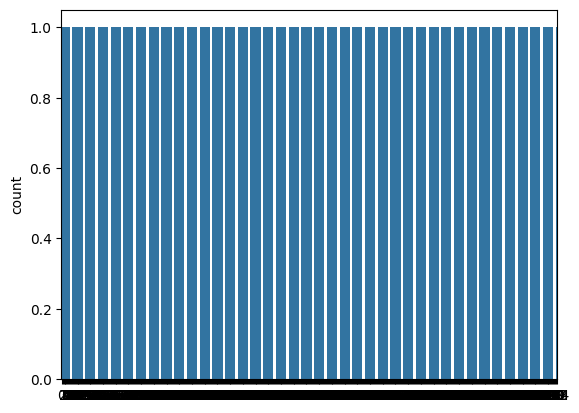

In [ ]:
sns.countplot(df['Label'])

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
# x_train

In [ ]:
# y_train

In [ ]:
# x_test

In [ ]:
# y_test

In [ ]:
#Check unique values for y_test
# y_test.unique()

In [ ]:
#Check unique values for y_train
# y_train.unique()

In [ ]:
# from sklearn.utils import compute_class_weight
# class_weights = compute_class_weight(
#                                         class_weight = "balanced",
#                                         classes = np.unique(y_train),
#                                         y = y_train
#                                     )
# class_weights = dict(zip(np.unique(y_train), class_weights))
# class_weights

In [ ]:
# from sklearn.preprocessing import StandardScaler
# #Normalize the data
# scaler = StandardScaler()
# scaler.fit(x)
# X_train_scalled = scaler.transform(x)
# # X_test_scalled = scaler.transform(x_test)

In [ ]:
# X_train_scalled.shape

In [ ]:
#Import packages for CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling1D
# from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2


In [ ]:
import os
import tempfile

In [ ]:
# def get_model():
#     ANN_model = Sequential()

#     ANN_model.add(Dense(1024,input_shape=(x.shape[1],),activation='sigmoid')),
#     ANN_model.add(BatchNormalization()),
#     ANN_model.add(Dropout(0.2)),
# #LAYER1
#     ANN_model.add(Dense(1024,activation='sigmoid')),
# #kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
# #kernel_regularizer=l2(0.001)
#     ANN_model.add(BatchNormalization()),
#     ANN_model.add(Dropout(0.3)),

# #LAYER2
#     ANN_model.add(Dense(1024,activation='sigmoid')),
# #kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
#     ANN_model.add(BatchNormalization()),
#     ANN_model.add(Dropout(0.4)),

# #LAYER3
#     ANN_model.add(Dense(1024,activation='sigmoid')),
# #kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
#     ANN_model.add(BatchNormalization()),
#     ANN_model.add(Dropout(0.4)),
#     ANN_model.add(Dense(7,activation='softmax')),

#     initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
#     ANN_model.save_weights(initial_weights)
#     ANN_model.load_weights(initial_weights)

#     optimiser = keras.optimizers.Adam(learning_rate=0.0001)
#     ANN_model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['SparseCategoricalAccuracy'])
#     return ANN_model

# model=get_model()

In [ ]:
# def showResults(test, pred):
#     print(classification_report(test, pred))
#     accuracy = accuracy_score(test, pred)
#     precision=precision_score(test, pred, average='weighted')
#     f1Score=f1_score(test, pred, average='weighted')
#     print("Accuracy  : {}".format(accuracy))
#     print("Precision : {}".format(precision))
#     print("f1Score : {}".format(f1Score))
#     cm=confusion_matrix(test, pred)
#     print(cm)

In [ ]:
# checkpoint_path='Ann_5fold_Savee_trial112.ckpt'
# checkpoint_dir=os.path.dirname(checkpoint_path)
# callback1=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_sparse_categorical_accuracy', verbose=1,
#    save_best_only=True,save_weights_only=True,)
# callback2=tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy',min_delta=0, patience=300, verbose=0, mode='auto',baseline=None,restore_best_weights=True)
# cp_callback=[callback1,callback2]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(x, y)
foldNum=0
for train_index, val_index in skf.split(x, y):
    foldNum+=1
    print(foldNum)
    print(train_index)
    print('stop')
    print(val_index)
    print('foldcompleted')
    X_train, X_val = x[train_index], x[val_index]
    Y_train, Y_val = y[train_index], y[val_index]
    if foldNum==1:
        x_train1=pd.DataFrame(X_train)
        x_test1=pd.DataFrame(X_val)
        y_train1=pd.DataFrame(Y_train)
        y_test1=pd.DataFrame(Y_val)
    elif foldNum==2:
        x_train2=pd.DataFrame(X_train)
        x_test2=pd.DataFrame(X_val)
        y_train2=pd.DataFrame(Y_train)
        y_test2=pd.DataFrame(Y_val)
    elif foldNum==3:
        x_train3=pd.DataFrame(X_train)
        x_test3=pd.DataFrame(X_val)
        y_train3=pd.DataFrame(Y_train)
        y_test3=pd.DataFrame(Y_val)
    elif foldNum==4:
        x_train4=pd.DataFrame(X_train)
        x_test4=pd.DataFrame(X_val)
        y_train4=pd.DataFrame(Y_train)
        y_test4=pd.DataFrame(Y_val)
    else:
        x_train5=pd.DataFrame(X_train)
        x_test5=pd.DataFrame(X_val)
        y_train5=pd.DataFrame(Y_train)
        y_test5=pd.DataFrame(Y_val)

#     print("Results for fold",foldNum)
#     X_train, X_val = X[train_index], X[val_index]
#     Y_train, Y_val = Y[train_index], Y[val_index]

    # one hot encode
#     Y_train = to_categorical(Y_train)
#     Y_val = to_categorical(Y_val)

#     history = model.fit(X_train_scalled, y_train,
#                         validation_data = (X_test_scalled, y_test),
#                         epochs=900,
#                         batch_size=64,verbose=1,class_weight=class_weights,callbacks=cp_callback)
#     model.load_weights(checkpoint_path)
#     yPredict = model.predict(X_test_scalled)

#     #Converting one hot encoded test label to label
#     pred = np.argmax(yPredict, axis=1)
#     val = y_test
#     showResults(val, pred)

1
[  0   1   3   4   5   6   7   8  10  11  12  13  14  15  18  19  20  21
  23  24  26  28  29  31  33  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  53  54  55  56  59  60  61  63  64  65  66  67
  70  71  72  73  74  75  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  99 100 101 102 103 104 105 107 108 109
 111 113 115 116 117 118 119 120 123 124 125 126 127 128 130 131 132 133
 134 135 136 137 140 141 142 144 145 146 147 148 149 150 152 154 156 157
 158 159 160 161 162 163 164 165 166 168 169 171 172 173 174 175 177 179
 180 181 182 183 186 187 188 189 190 191 193 194 195 197 198 199 200 201
 202 203 204 205 206 208 209 212 213 214 215 216 217 218 220 222 223 224
 225 226 227 230 231 232 233 235 236 237 240 241 242 243 244 245 246 247
 248 250 251 252 253 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 272 273 274 276 278 279 280 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 298 299 300 303 304 

In [ ]:
x_train1

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,1.597646,...,0.635609,0.675823,0.684034,0.627376,-0.001574,0.012645,-0.027069,0.019313,-0.002252,-0.006220
1,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,7.846351,...,0.646426,0.635522,0.544438,0.532856,-0.018488,0.011973,-0.011038,0.079758,-0.021044,-0.019445
2,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,-7.022445,...,0.506934,0.575784,0.523305,0.423375,0.009395,-0.025547,-0.035554,-0.025885,0.011198,-0.000163
3,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,2.848643,...,0.698287,0.615263,0.566964,0.605103,-0.008389,-0.051995,-0.056544,-0.020014,0.013964,0.008349
4,-451.45264,71.335200,12.223010,32.649555,3.997801,15.200773,-2.812883,-1.384373,-6.467040,-0.458348,...,0.696758,0.719856,0.667424,0.570905,0.003044,-0.006101,-0.009038,-0.049699,0.027615,0.021319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,-478.05527,5.705422,-24.631056,27.622614,-19.235449,-7.040019,-13.293165,-9.629133,-14.067036,-12.944608,...,0.597085,0.590422,0.481957,0.481437,-0.011216,-0.031485,-0.029936,0.042160,-0.013815,0.009839
424,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,-3.372870,...,0.566316,0.569263,0.551809,0.576764,0.016046,-0.025610,0.025426,-0.094371,0.008999,-0.004985
425,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,-1.778869,...,0.671834,0.638155,0.574542,0.503516,0.019632,0.046315,0.074801,0.018078,0.022948,-0.016365
426,-526.19570,11.317784,-18.942173,29.540787,-28.057306,1.299599,-16.251814,-7.512440,-23.191568,-13.485355,...,0.497285,0.528861,0.501070,0.496900,0.007856,0.005917,-0.045393,-0.004246,-0.001628,0.015051


In [ ]:
y_train1

,0
0,0
1,1
2,0
3,1
4,3
...,...
423,0
424,5
425,3
426,2


In [ ]:
x_test1

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,-2.445232,...,0.600825,0.648380,0.675295,0.560000,-0.010576,-0.000228,0.011102,-0.074188,0.012116,-0.000779
1,-478.92007,56.887730,-9.496516,12.799419,-0.196528,3.286758,-9.909594,-2.337262,-7.694031,-0.081845,...,0.649602,0.664169,0.700484,0.594266,-0.029971,0.019514,-0.009344,-0.040153,0.013369,-0.006417
2,-449.64343,72.503365,11.100903,33.304817,3.467445,6.772911,-3.323741,-7.746681,-9.884865,2.454652,...,0.648118,0.661381,0.594747,0.571205,0.010062,0.019729,-0.021405,-0.003546,0.006231,0.004258
3,-448.45706,71.748140,15.644665,37.692158,1.685971,14.594450,-1.984497,-2.601064,-4.511068,3.424783,...,0.744050,0.738209,0.685561,0.608525,0.010726,0.004152,0.011977,-0.039160,0.010682,0.003822
4,-414.10510,86.937454,8.643685,41.722900,3.845868,16.058064,-6.323769,-8.956205,-6.782947,3.228461,...,0.536966,0.533943,0.539635,0.496446,0.031052,0.047855,-0.039647,0.006998,0.021142,-0.037041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-542.56660,2.070298,-18.764479,16.167446,-24.879025,1.178926,-15.186148,-2.770954,-14.010069,-16.728289,...,0.600697,0.532020,0.520468,0.532640,-0.002613,0.006743,0.025558,-0.024244,-0.016319,0.003650
103,-406.23282,75.852394,-8.423434,34.064934,-11.914997,7.173997,-20.511670,-12.389133,-5.993309,1.114186,...,0.480231,0.502517,0.556970,0.543809,0.005737,-0.018652,0.023123,0.039628,0.024378,0.005283
104,-427.61200,36.440388,-21.528141,13.495537,-19.663698,4.418462,-20.588242,-13.769891,-17.446966,-3.357204,...,0.396666,0.377521,0.407803,0.410098,0.005356,-0.030501,-0.028373,0.043300,0.014572,-0.005967
105,-397.74173,65.599550,-1.686943,38.130620,-12.816805,14.129421,-20.335257,-13.580517,-3.846510,-1.940404,...,0.568361,0.574512,0.554483,0.523765,0.003604,-0.009971,-0.011075,-0.030320,-0.005274,-0.003526


In [ ]:
y_test1

,0
0,2
1,0
2,1
3,3
4,5
...,...
102,2
103,5
104,4
105,5


In [ ]:
# # y_test1.reset_index()
# y_test1.reset_index(inplace=True)

In [ ]:
y_test1

,0
0,2
1,0
2,1
3,3
4,5
...,...
102,2
103,5
104,4
105,5


In [ ]:
type(y_train1)

pandas.core.frame.DataFrame

In [ ]:
# y_test1=y_test1.iloc[:,-1]

In [ ]:
fold1_train=pd.concat([x_train1, y_train1], axis=1,join='inner')

In [ ]:
fold1_train.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/train_fold1.csv')

In [ ]:
fold1_test=pd.concat([x_test1, y_test1], axis=1,join='inner')

In [ ]:
fold1_test.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/test_fold1.csv')

# generation for fold2 training and testing csv file

In [ ]:
x_train2

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,1.597646,...,0.635609,0.675823,0.684034,0.627376,-0.001574,0.012645,-0.027069,0.019313,-0.002252,-0.006220
1,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,7.846351,...,0.646426,0.635522,0.544438,0.532856,-0.018488,0.011973,-0.011038,0.079758,-0.021044,-0.019445
2,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,-2.445232,...,0.600825,0.648380,0.675295,0.560000,-0.010576,-0.000228,0.011102,-0.074188,0.012116,-0.000779
3,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,2.848643,...,0.698287,0.615263,0.566964,0.605103,-0.008389,-0.051995,-0.056544,-0.020014,0.013964,0.008349
4,-451.45264,71.335200,12.223010,32.649555,3.997801,15.200773,-2.812883,-1.384373,-6.467040,-0.458348,...,0.696758,0.719856,0.667424,0.570905,0.003044,-0.006101,-0.009038,-0.049699,0.027615,0.021319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,-429.41583,51.232320,-4.127894,38.715740,2.253632,-2.197497,-15.981533,-14.225066,-17.897070,-6.940356,...,0.556236,0.589742,0.609879,0.515997,-0.019026,0.000340,-0.022717,-0.020690,-0.002970,-0.001101
424,-478.05527,5.705422,-24.631056,27.622614,-19.235449,-7.040019,-13.293165,-9.629133,-14.067036,-12.944608,...,0.597085,0.590422,0.481957,0.481437,-0.011216,-0.031485,-0.029936,0.042160,-0.013815,0.009839
425,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,-3.372870,...,0.566316,0.569263,0.551809,0.576764,0.016046,-0.025610,0.025426,-0.094371,0.008999,-0.004985
426,-467.15588,52.217026,10.470471,47.414780,8.690019,15.601270,-2.032935,4.985774,-7.432734,2.523657,...,0.531997,0.523647,0.509723,0.498566,0.051532,0.015525,-0.006052,0.018201,0.004361,-0.021649


In [ ]:
y_train2

,0
0,0
1,1
2,2
3,1
4,3
...,...
423,6
424,0
425,5
426,3


In [ ]:
x_test2

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,-7.022445,...,0.506934,0.575784,0.523305,0.423375,0.009395,-0.025547,-0.035554,-0.025885,0.011198,-0.000163
1,-445.90384,103.783450,1.365116,27.908356,-4.542189,10.230102,-10.717600,-8.279192,-2.135225,2.236455,...,0.590438,0.659291,0.604083,0.500168,0.006800,-0.019560,-0.049193,-0.089028,0.020237,0.023672
2,-432.85320,94.606660,-5.319786,25.696900,0.194088,7.087550,-1.224768,-5.595039,-10.824135,5.297798,...,0.622093,0.605255,0.605432,0.592474,-0.008104,-0.009647,-0.046115,-0.007378,0.006855,-0.004688
3,-414.28708,45.442410,5.925002,21.436172,0.354569,7.393221,-7.657958,-4.724375,-18.931787,-5.367548,...,0.648508,0.618056,0.525700,0.500340,-0.018470,-0.007622,-0.006954,0.023004,0.002193,-0.005318
4,-434.16900,78.900970,4.866675,45.928330,4.804515,2.177262,-13.456310,-5.863212,-3.584935,1.929884,...,0.658636,0.660314,0.630964,0.564337,-0.004686,0.006942,0.026904,0.006124,0.004141,0.017759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-392.46520,73.364350,-3.410112,28.893300,-9.239878,17.295076,-14.857638,-8.589843,-15.333829,0.998701,...,0.571422,0.555782,0.517858,0.473756,0.000104,-0.007319,-0.020273,0.040238,0.012407,-0.014820
103,-431.76166,50.142090,3.661988,45.098984,-13.927658,-0.977742,-16.576310,0.029880,-0.389472,-4.431534,...,0.583082,0.607035,0.589502,0.506217,0.006985,0.040552,0.005959,-0.065906,-0.023141,-0.005444
104,-403.50656,30.989262,-12.756512,27.214573,-10.573180,-0.137991,-15.470394,-8.865036,-16.384440,-6.866915,...,0.457819,0.531090,0.567376,0.470224,-0.005500,0.013583,0.040782,0.003971,0.017743,0.026657
105,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,-1.778869,...,0.671834,0.638155,0.574542,0.503516,0.019632,0.046315,0.074801,0.018078,0.022948,-0.016365


In [ ]:
y_test2

,0
0,0
1,5
2,1
3,0
4,5
...,...
102,1
103,5
104,4
105,3


In [ ]:
fold2_train=pd.concat([x_train2, y_train2], axis=1)

In [ ]:
fold2_train.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/train_fold2.csv')

In [ ]:
fold2_test=pd.concat([x_test2, y_test2], axis=1)

In [ ]:
fold2_test.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/test_fold2.csv')

# generation for fold3 training and testing csv file

In [ ]:
fold3_train=pd.concat([x_train3, y_train3], axis=1,join='inner')
fold3_train.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/train_fold3.csv')
fold3_test=pd.concat([x_test3, y_test3], axis=1,join='inner')
fold3_test.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/test_fold3.csv')

#  generation for fold4 training and testing csv file

In [ ]:
fold4_train=pd.concat([x_train4, y_train4], axis=1,join='inner')
fold4_train.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/train_fold4.csv')
fold4_test=pd.concat([x_test4, y_test4], axis=1,join='inner')
fold4_test.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/test_fold4.csv')

# generation for fold5 training and testing csv file

In [ ]:
fold5_train=pd.concat([x_train5, y_train5], axis=1,join='inner')
fold5_train.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/train_fold5.csv')
fold5_test=pd.concat([x_test5, y_test5], axis=1,join='inner')
fold5_test.to_csv('/content/drive/MyDrive/DATASETS/EmoDB Dataset/test_fold5.csv')